In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager, rc
import matplotlib as mpl

In [2]:
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
mpl.rcParams['axes.unicode_minus']=False # -값 오류나지않게
rc('font' ,family=font_name)

embadding_model = Word2Vec.load('./models/word2vecModel.model')
print(list(embadding_model.wv.index_to_key))
print(len(list(embadding_model.wv.index_to_key)))

['하다', '영화', '되다', '보다', '것', '있다', '감독', '이다', '개봉', '않다', '출연', '나오다', '좋다', '생각', '되어다', '작품', '리뷰', '싶다', '말', '배우', '들다', '이야기', '사람', '같다', '없다', '자신', '만들다', '받다', '사랑', '장면', '가다', '보기', '시작', '연기', '모습', '아니다', '그', '주인공', '모르다', '오다', '평점', '미국', '그렇다', '그녀', '아이', '가족', '알다', '일', '정도', '캐릭터', '보여주다', '마음', '크다', '주다', '느끼다', '많다', '친구', '버리다', '느낌', '만나다', '보이다', '시간', '때', '스토리', '부분', '사건', '찾다', '점', '년', '관객', '통해', '세상', '내용', '연출', '모든', '상황', '내다', '살다', '남자', '해주다', '마지막', '분', '좋아하다', '처음', '집', '엄마', '액션', '인물', '일본', '하나', '여자', '가지', '예고편', '위', '기억', '등장', '죽다', '현실', '관람', '인간', '속', '삶', '세계', '한국', '사실', '내', '새롭다', '나다', '더', '시키다', '맞다', '원작', '영상', '떠나다', '문제', '존재', '아들', '나', '진짜', '먹다', '역', '남다', '곳', '저', '알', '아버지', '이름', '개인', '맡다', '서로', '여성', '이해', '전', '대한민국', '자다', '해보다', '어리다', '거', '이', '사회', '이유', '기대', '감정', '돼다', '드라마', '극장', '주연', '시리즈', '과거', '제목', '담다', '의미', '순간', '나가다', '제작', '아쉽다', '등', '실제', '공포', '다루다', '다르다', '음악', '애니메이션', '어떻다',

In [19]:
key_word = '네이버'
sim_word = embadding_model.wv.similar_by_word(key_word,topn=10)
print(sim_word)
print(len(sim_word))

[('출처', 0.7521120309829712), ('동영상', 0.6678980588912964), ('첨부', 0.6473550796508789), ('영화정보', 0.6443079113960266), ('원본', 0.643092691898346), ('지도', 0.6197879910469055), ('본보기', 0.6148914694786072), ('예고편', 0.6060406565666199), ('포토', 0.5757351517677307), ('정보', 0.5740865468978882)]
10


In [20]:
vectors = []
labels = []

for label, _ in sim_word:  # sim_word 딕셔너리형태인데 label만 사용하기 때문에 불 필요한 경우 _ 사용
    labels.append(label)
    vectors.append(embadding_model.wv[label])
df_vetors = pd.DataFrame(vectors)
print(df_vetors)

         0         1         2         3         4         5         6   \
0  0.261436 -0.619424 -0.062187 -0.146440 -0.081872 -0.089059 -0.586945   
1  0.373543 -0.790164 -0.070659 -0.033438  0.187291 -0.387187 -0.638467   
2  0.687509 -1.063933 -0.105245 -0.197654  0.071070 -0.605347 -0.467003   
3  0.041248 -0.446572 -0.404030 -0.130275  0.051531 -0.906787 -0.381611   
4  0.514705 -0.877173  0.221133 -0.397870  0.413186 -0.964635 -0.765944   
5  0.518647 -0.865803 -0.205884 -0.298780 -0.239291 -0.197115 -0.162379   
6  0.518067 -0.801516  0.015751 -0.348596  0.204679 -0.519115 -0.730052   
7  0.310607 -0.486531 -0.224260 -0.117427 -0.020783  0.398242 -0.791774   
8  0.201747 -0.207739  0.251816  0.272914  0.005858 -0.523413  0.086907   
9 -0.145313 -0.635543 -0.203279 -0.001252  0.076906 -0.165018 -0.778980   

         7         8         9   ...        90        91        92        93  \
0 -0.582633 -0.436124 -0.019193  ...  0.457484 -0.101231  0.202851 -0.392595   
1 -0.261198 -0

In [22]:
tsne_model = TSNE(perplexity=40 , n_components=2, init='pca', n_iter=2500)
new_value = tsne_model.fit_transform(df_vetors)  #차원축소

df_xy = pd.DataFrame({'word':labels ,
                      'x' : new_value[:,0],
                      'y' : new_value[:,1]})
print(df_xy)

C:\Anaconda\envs\music_category_classification\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
C:\Anaconda\envs\music_category_classification\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


   word           x           y
0    출처  177.215729   -7.727578
1   동영상  -58.138870   25.452950
2    첨부 -168.972778  108.815010
3  영화정보   35.882698  -56.566788
4    원본   81.796936   92.154381
5    지도   -4.613467 -211.238312
6   본보기  134.766571 -154.081650
7   예고편  -30.684643  172.570267
8    포토  -99.855934 -117.040962
9    정보 -206.713318  -36.549313


In [25]:
df_xy.shape
df_xy.loc[df_xy.shape[0]] = (key_word, 0 ,0 )

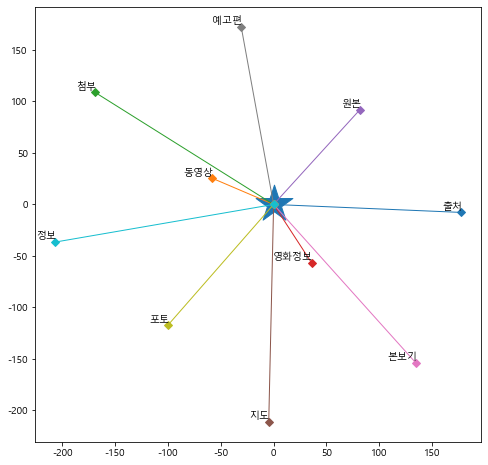

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(0, 0 ,s=1500 , marker='*')  # 중심점
for i in range(len(df_xy.x) -1):
    a = df_xy.loc[[i , (len(df_xy) -1 )], :]  # 키워드포함11개이므로 1 개 제거
    plt.plot(a.x , a.y ,'-D', linewidth=1)     #각각의 키워드와 선을 그음
    plt.annotate(df_xy.word[i] , xytext=(1,1 ),  #중복제거
                 xy=(df_xy.x[i], df_xy.y[i]),  #단어 출력
                 textcoords= 'offset points',
                 ha='right' , va='bottom')
plt.show()